In [5]:
%run /home/grg/git/alfa/nilearn-helper.py
import pandas as pd
from nilearn import image
import json
from glob import glob

def getdict(data, key, column, column2=None, value=None):
    import string
    if not value is None:
        data = data[data[column2] == value]
        
    d1 = dict([(string.atoi(str(int(e))), v) for e, v in data[[key, column]].to_dict(orient='split')['data']])
    return d1

In [3]:
wd = '/home/grg/spm'
alfad = '/home/grg/data/ALFA_DWI/'
demfp = osp.join(wd, 'data', 'Data_VBM_Alfa.csv')
demo = pd.read_csv(demfp)
fsvol_fp = osp.join(wd, 'data', 'aseg FS ALFA.xlsx')
jdgfp = osp.join(wd, 'data', 'Ventricular volumes.xlsx')

tivs = getdict(demo, 'Subj_ID', 'Tot Intracranial Volume (mm^3)')

vvol = pd.read_excel(fsvol_fp)
vvol_l = getdict(vvol, 'subject', 'Volume_mm3', 'StructName', 'Left-Lateral-Ventricle')
vvol_r = getdict(vvol, 'subject', 'Volume_mm3', 'StructName', 'Right-Lateral-Ventricle')
vvol_li = getdict(vvol, 'subject', 'Volume_mm3', 'StructName','Left-Inf-Lat-Vent')
vvol_ri = getdict(vvol, 'subject', 'Volume_mm3', 'StructName','Right-Inf-Lat-Vent')
vvol_3 = getdict(vvol, 'subject', 'Volume_mm3', 'StructName','3rd-Ventricle')
vvol_4 = getdict(vvol, 'subject', 'Volume_mm3', 'StructName', '4th-Ventricle')

jdg = pd.read_excel(jdgfp)
jdg_tivs = getdict(jdg, 'subject', 'Total Intracranial Volume')
jdg_vvol = getdict(jdg, 'subject', 'Ventricular Volume')
jdg_vvol = dict([(e,v*1000) for e,v in jdg_vvol.items()])

subjects = json.load(open(osp.join(wd, 'data', 'subjects.json')))
genders = json.load(open(osp.join(wd, 'data', 'genders.json')))
educyears = json.load(open(osp.join(wd, 'data', 'educyears.json')))
ages = json.load(open(osp.join(wd, 'data', 'age.json')))
tivs = json.load(open(osp.join(wd, 'data', 'tiv.json')))
perid = osp.join(wd, 'ROIvent')
jacod = osp.join(wd, 'Jacobians')
mdd = osp.join(wd, 'MD')

In [244]:
groups_size = [102, 44, 143, 160, 65]
groups_names = ['Apoe2-3', 'Apoe2-4', 'Apoe3-3', 'Apoe3-4', 'Apoe4-4']

groups = []
start = 0
for size in groups_size:
    g = subjects[start:start + size]
    start = start + size
    groups.append(g)

data = []
for s in subjects:
    try:
        print s
        perifp = glob(osp.join(perid, '%s_latvent_dilated.nii.gz'%s))[0]
        print perifp
        #jacofp = glob(osp.join(jacod, 's6j_t1_%s.nii'%s))[0]
        mdfp = glob(osp.join(mdd, '%s*_MD_MNIspace_s.nii'%s))[0]
        mdt1fp = glob(osp.join(alfad, '%s*'%s, 'DWI', '%s*_MD_t1space.nii.gz'%s))[0]
        
        md = np.array(nib.load(mdt1fp).dataobj)
        peri = np.array(nib.load(perifp).dataobj)
        mdl = np.mean(md[np.abs(peri-1)<0.5])
        mdr = np.mean(md[np.abs(peri-2)<0.5])
        
        age = ages[str(s)]
        group = [s in each for each in groups].index(True)
        ey = educyears[str(s)]
        jdgvol = jdg_vvol[s]
        gender = genders[str(s)]
        vl = vvol_l[s]# / tivs[str(s)]# +vvol_li[s]
        vr = vvol_r[s]# / tivs[str(s)]# + vvol_ri[s]
                
        row = [s, group, age, age*age, gender, ey, mdl, mdr, vl, vr]
        data.append(row)
        
    except IndexError as e:
        print s, e

10070
/home/grg/spm/ROIvent/10070_latvent_dilated.nii.gz
10102
/home/grg/spm/ROIvent/10102_latvent_dilated.nii.gz
10108
/home/grg/spm/ROIvent/10108_latvent_dilated.nii.gz
10235
/home/grg/spm/ROIvent/10235_latvent_dilated.nii.gz
10365
/home/grg/spm/ROIvent/10365_latvent_dilated.nii.gz
10419
/home/grg/spm/ROIvent/10419_latvent_dilated.nii.gz
10463
/home/grg/spm/ROIvent/10463_latvent_dilated.nii.gz
10530
/home/grg/spm/ROIvent/10530_latvent_dilated.nii.gz
10551
/home/grg/spm/ROIvent/10551_latvent_dilated.nii.gz
10563
/home/grg/spm/ROIvent/10563_latvent_dilated.nii.gz
10576
/home/grg/spm/ROIvent/10576_latvent_dilated.nii.gz
10630
/home/grg/spm/ROIvent/10630_latvent_dilated.nii.gz
10668
/home/grg/spm/ROIvent/10668_latvent_dilated.nii.gz
10692
/home/grg/spm/ROIvent/10692_latvent_dilated.nii.gz
10693
/home/grg/spm/ROIvent/10693_latvent_dilated.nii.gz
10703
/home/grg/spm/ROIvent/10703_latvent_dilated.nii.gz
10725
/home/grg/spm/ROIvent/10725_latvent_dilated.nii.gz
10737
/home/grg/spm/ROIvent/107

Checking the matching between ROI and data with an example

/home/grg/data/ALFA_DWI/77179/DWI/77179_MD_t1space.nii.gz /home/grg/spm/ROIvent/77179_latvent_dilated.nii.gz (174, 256, 256) (174, 256, 256)
Saving to... /tmp/tmp3QrlIa.png


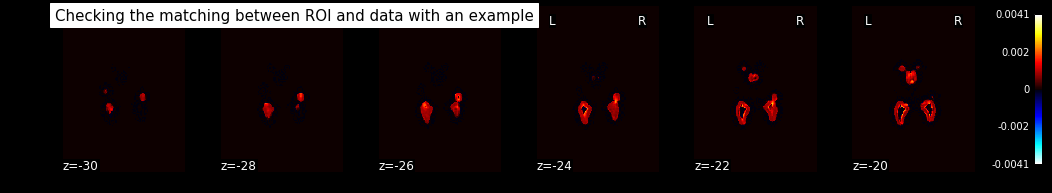

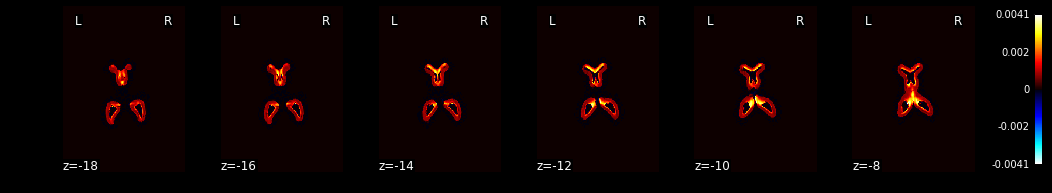

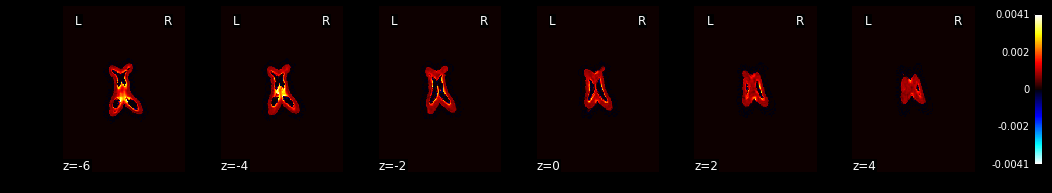

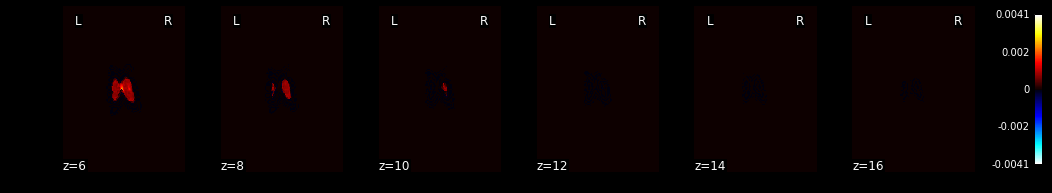

In [245]:
mdt1fp = '/home/grg/data/ALFA_DWI/77179/DWI/77179_MD_t1space.nii.gz'
sample_md = np.array(nib.load(mdt1fp).dataobj, copy=True)
perifp = '/home/grg/spm/ROIvent/77179_latvent_dilated.nii.gz'
sample_peri = np.array(nib.load(perifp).dataobj, copy=True)
print mdt1fp, perifp, sample_md.shape, sample_peri.shape
from nilearn import image
%matplotlib inline
sample_md[sample_peri<0.5] = 0
plot_stat_map(image.new_img_like(mdt1fp, sample_md), start =-30, end=10, step=2, row_l=6, title='Checking the matching between ROI and data with an example')


Storing data in an Excel table then load it for analysis

In [246]:
df = pd.DataFrame(data, columns=['subject', 'group', 'age', 'agesq', 'gender', 'educyears', 'mdl', 'mdr', 'vl', 'vr'], index=subjects)
df.drop(10657, inplace=True) # ventricles failed
df.drop(10701, inplace=True) # ventricles failed
df.drop(21057, inplace=True) # ventricles failed

del df['subject']
df
df.to_excel('/tmp/roi_native.xls')

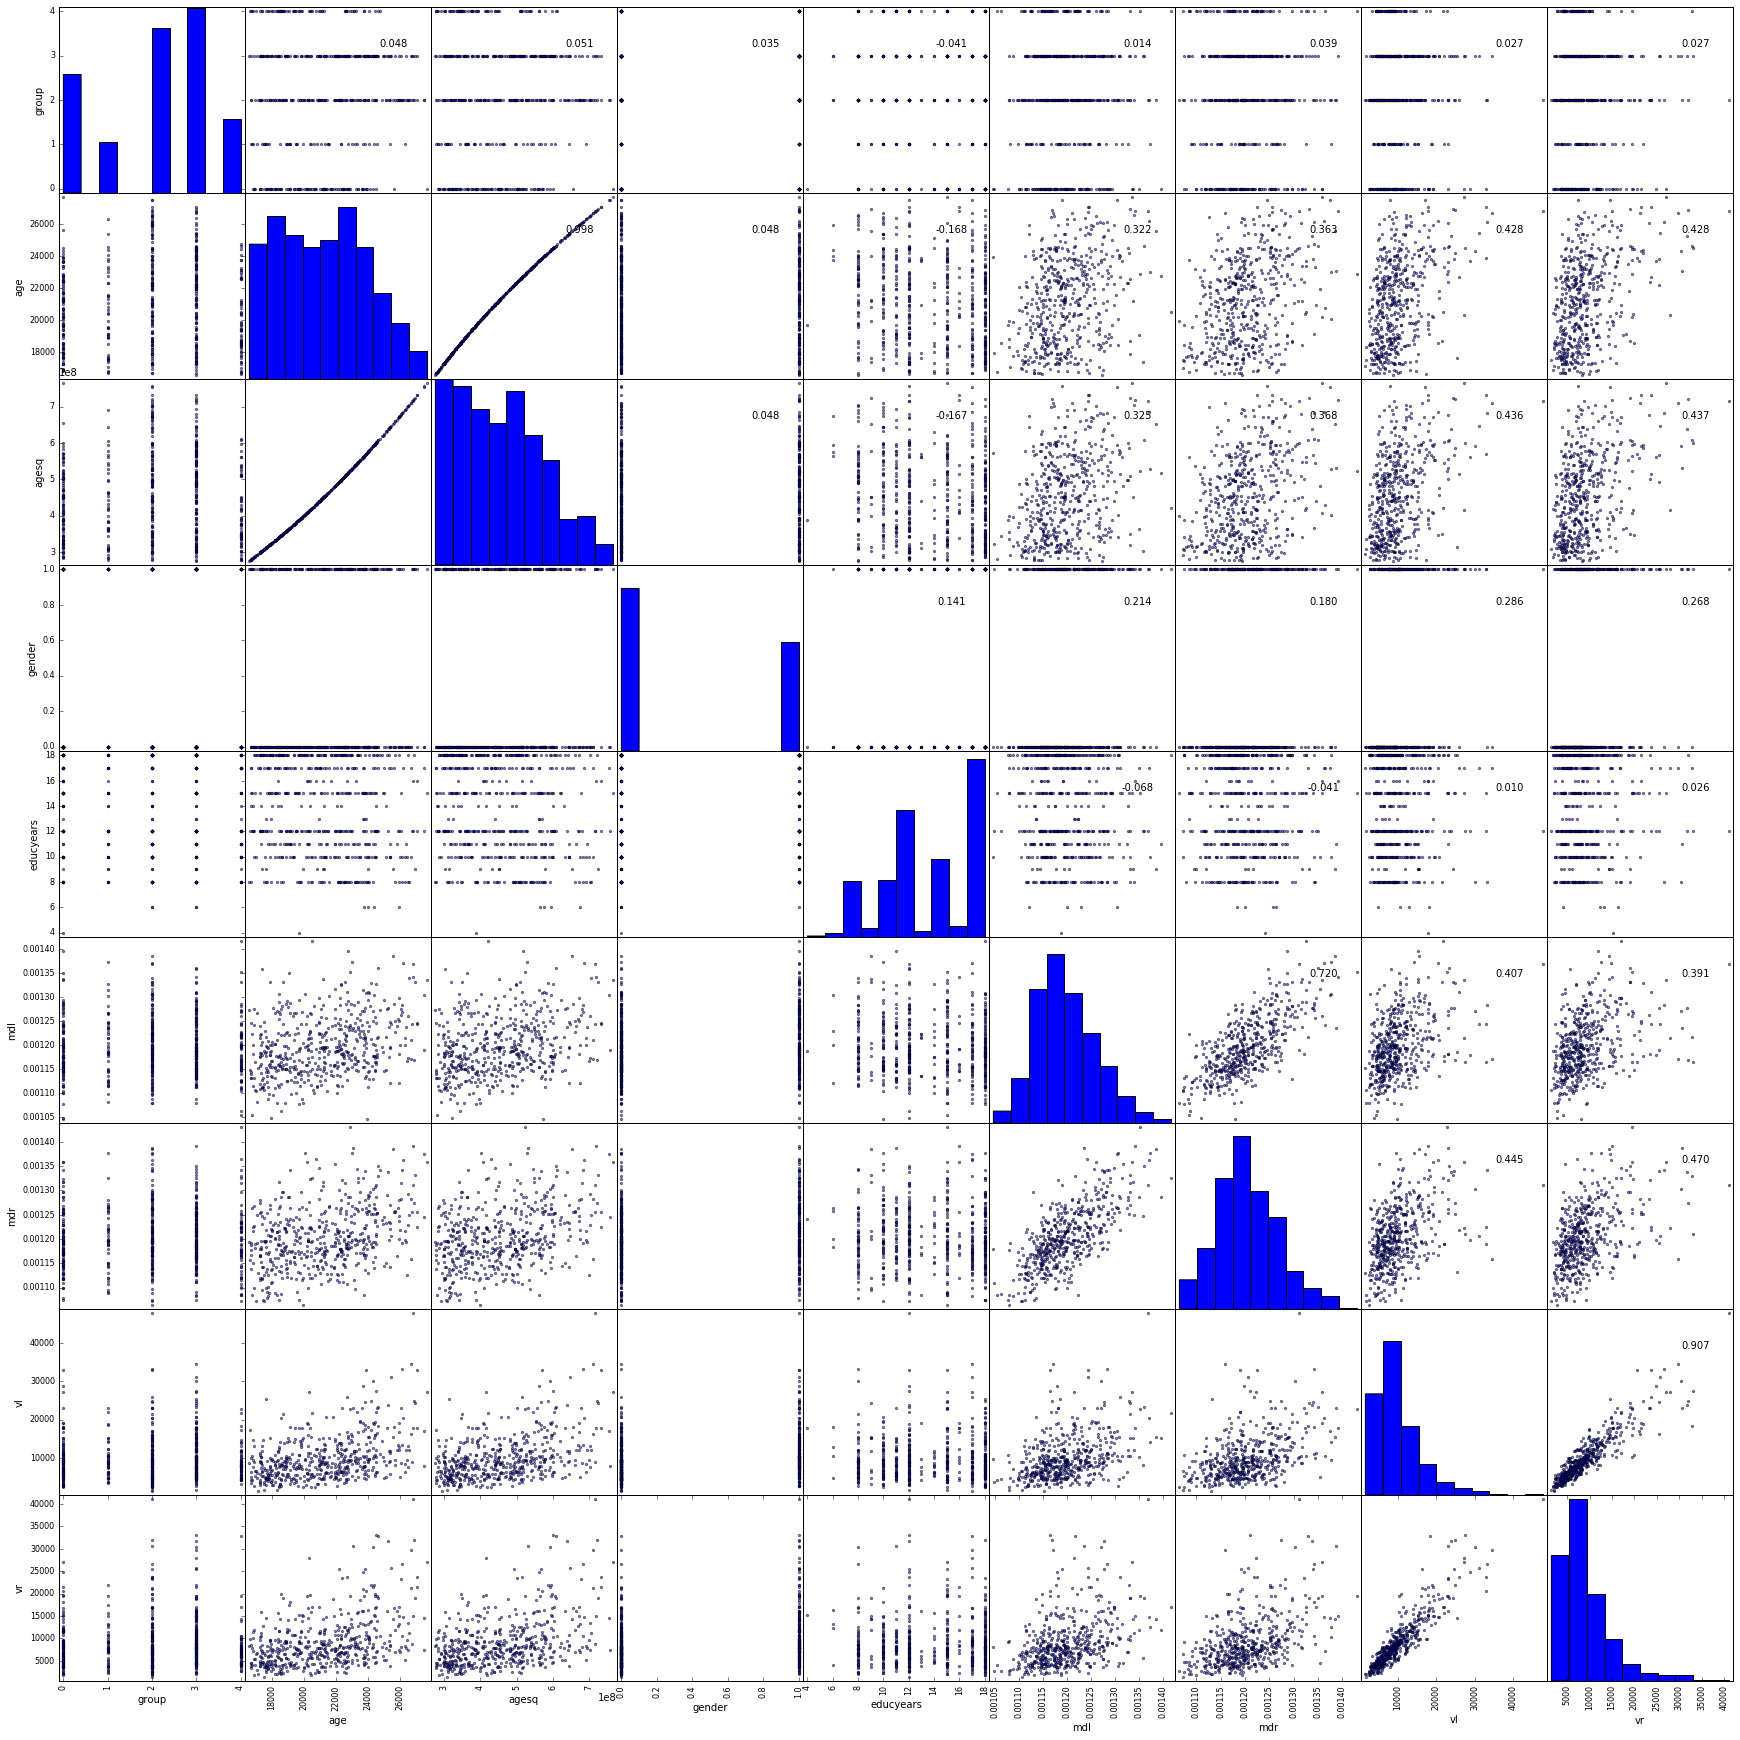

In [247]:
df = pd.read_excel('/tmp/roi_native.xls')
axes = pd.scatter_matrix(df, figsize=(30,30))
corr = df.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

plt.show()


Doing it in MNI on normalized data

In [248]:
#md_mni = glob('/home/grg/data/ALFA_DWI/*/DWI/*MD_MNIspace.nii.gz')
groups_size = [102, 44, 143, 160, 65]
groups_names = ['Apoe2-3', 'Apoe2-4', 'Apoe3-3', 'Apoe3-4', 'Apoe4-4']

groups = []
start = 0
for size in groups_size:
    g = subjects[start:start + size]
    start = start + size
    groups.append(g)

data_mni = []
for s in subjects:
    try:
        print s
        perifp = '/tmp/perivent_MNIspace.nii.gz' #glob(osp.join(perid, '%s_latvent_dilated.nii.gz'%s))[0]
        print perifp
        mdmnifp = glob(osp.join(alfad, '%s*'%s, 'DWI', '%s*_MD_MNIspace.nii.gz'%s))[0]
        
        mdmni = np.array(nib.load(mdmnifp).dataobj)
        im_peri = nib.load(perifp)
        
        resample_im_peri = np.array(image.resample_to_img(im_peri, mdmnifp, interpolation='nearest').dataobj)
        
        mdl = np.mean(mdmni[np.abs(resample_im_peri-2)<0.5])
        mdr = np.mean(mdmni[np.abs(resample_im_peri-1)<0.5])
        
        age = ages[str(s)]
        group = [s in each for each in groups].index(True)
        ey = educyears[str(s)]
        jdgvol = jdg_vvol[s]
        gender = genders[str(s)]
        vl = vvol_l[s]# / tivs[str(s)]# +vvol_li[s]
        vr = vvol_r[s]# / tivs[str(s)]# + vvol_ri[s]
                
        row = [s, group, age, age*age, gender, ey, mdl, mdr, vl, vr]
        data_mni.append(row)
        
    except IndexError as e:
        print s, e

10070
/tmp/perivent_MNIspace.nii.gz
10102
/tmp/perivent_MNIspace.nii.gz
10108
/tmp/perivent_MNIspace.nii.gz
10235
/tmp/perivent_MNIspace.nii.gz
10365
/tmp/perivent_MNIspace.nii.gz
10419
/tmp/perivent_MNIspace.nii.gz
10463
/tmp/perivent_MNIspace.nii.gz
10530
/tmp/perivent_MNIspace.nii.gz
10551
/tmp/perivent_MNIspace.nii.gz
10563
/tmp/perivent_MNIspace.nii.gz
10576
/tmp/perivent_MNIspace.nii.gz
10630
/tmp/perivent_MNIspace.nii.gz
10668
/tmp/perivent_MNIspace.nii.gz
10692
/tmp/perivent_MNIspace.nii.gz
10693
/tmp/perivent_MNIspace.nii.gz
10703
/tmp/perivent_MNIspace.nii.gz
10725
/tmp/perivent_MNIspace.nii.gz
10737
/tmp/perivent_MNIspace.nii.gz
10756
/tmp/perivent_MNIspace.nii.gz
10809
/tmp/perivent_MNIspace.nii.gz
11045
/tmp/perivent_MNIspace.nii.gz
11047
/tmp/perivent_MNIspace.nii.gz
11048
/tmp/perivent_MNIspace.nii.gz
11133
/tmp/perivent_MNIspace.nii.gz
11180
/tmp/perivent_MNIspace.nii.gz
11225
/tmp/perivent_MNIspace.nii.gz
11262
/tmp/perivent_MNIspace.nii.gz
11305
/tmp/perivent_MNIspace

/home/grg/data/ALFA_DWI/77179/DWI/77179_MD_MNIspace.nii.gz /tmp/perivent_MNIspace.nii.gz (91, 109, 91) (91, 109, 91)
Saving to... /tmp/tmphFoh77.png


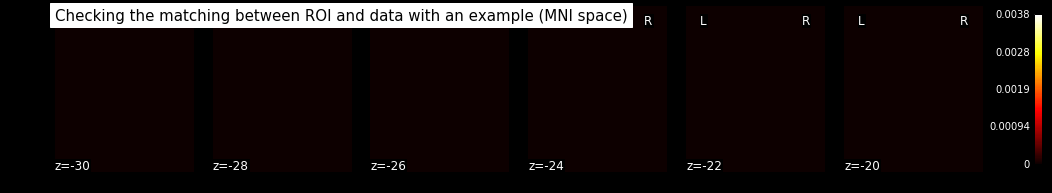

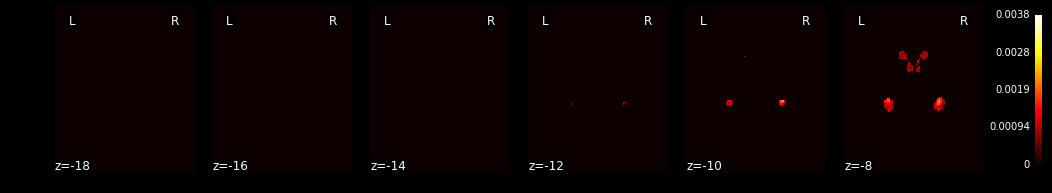

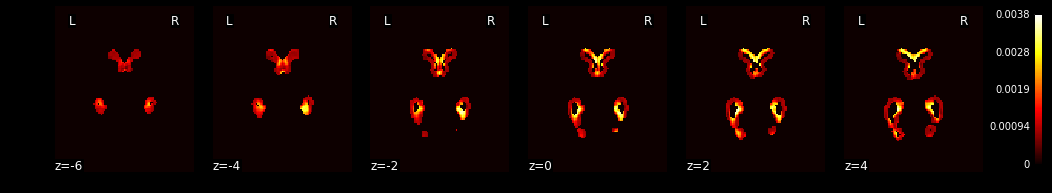

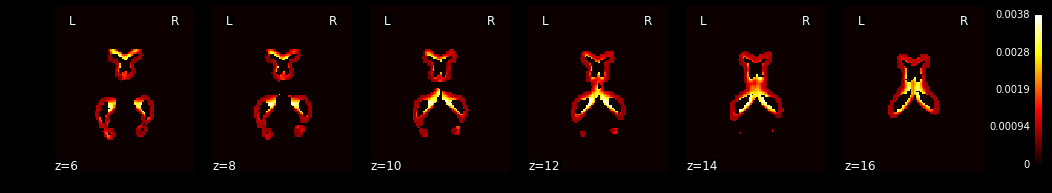

In [249]:
sample_md = np.array(nib.load(mdmnifp).dataobj)
sample_peri = np.array(nib.load('/tmp/perivent_MNIspace.nii.gz').dataobj)
resample_peri = image.resample_to_img('/tmp/perivent_MNIspace.nii.gz', mdmnifp, interpolation='nearest').dataobj
#resample_peri.to_filename('/tmp/peri_resample.nii.gz')
print mdmnifp, perifp, sample_md.shape, resample_peri.shape
from nilearn import image
%matplotlib inline
sample_md[resample_peri<1] = 0
plot_stat_map(image.new_img_like(mdmnifp, sample_md), start =-30, end=10, step=2, row_l=6, title='Checking the matching between ROI and data with an example (MNI space)')


In [250]:
df_mni = pd.DataFrame(data_mni, columns=['subject', 'group', 'age', 'agesq', 'gender', 'educyears', 'mdl', 'mdr', 'vl', 'vr'], index=subjects)
df_mni.drop(10657, inplace=True) # ventricles failed
df_mni.drop(10701, inplace=True) # ventricles failed
df_mni.drop(21057, inplace=True) # ventricles failed

del df_mni['subject']
df_mni.to_excel('/tmp/roi_mni.xls')

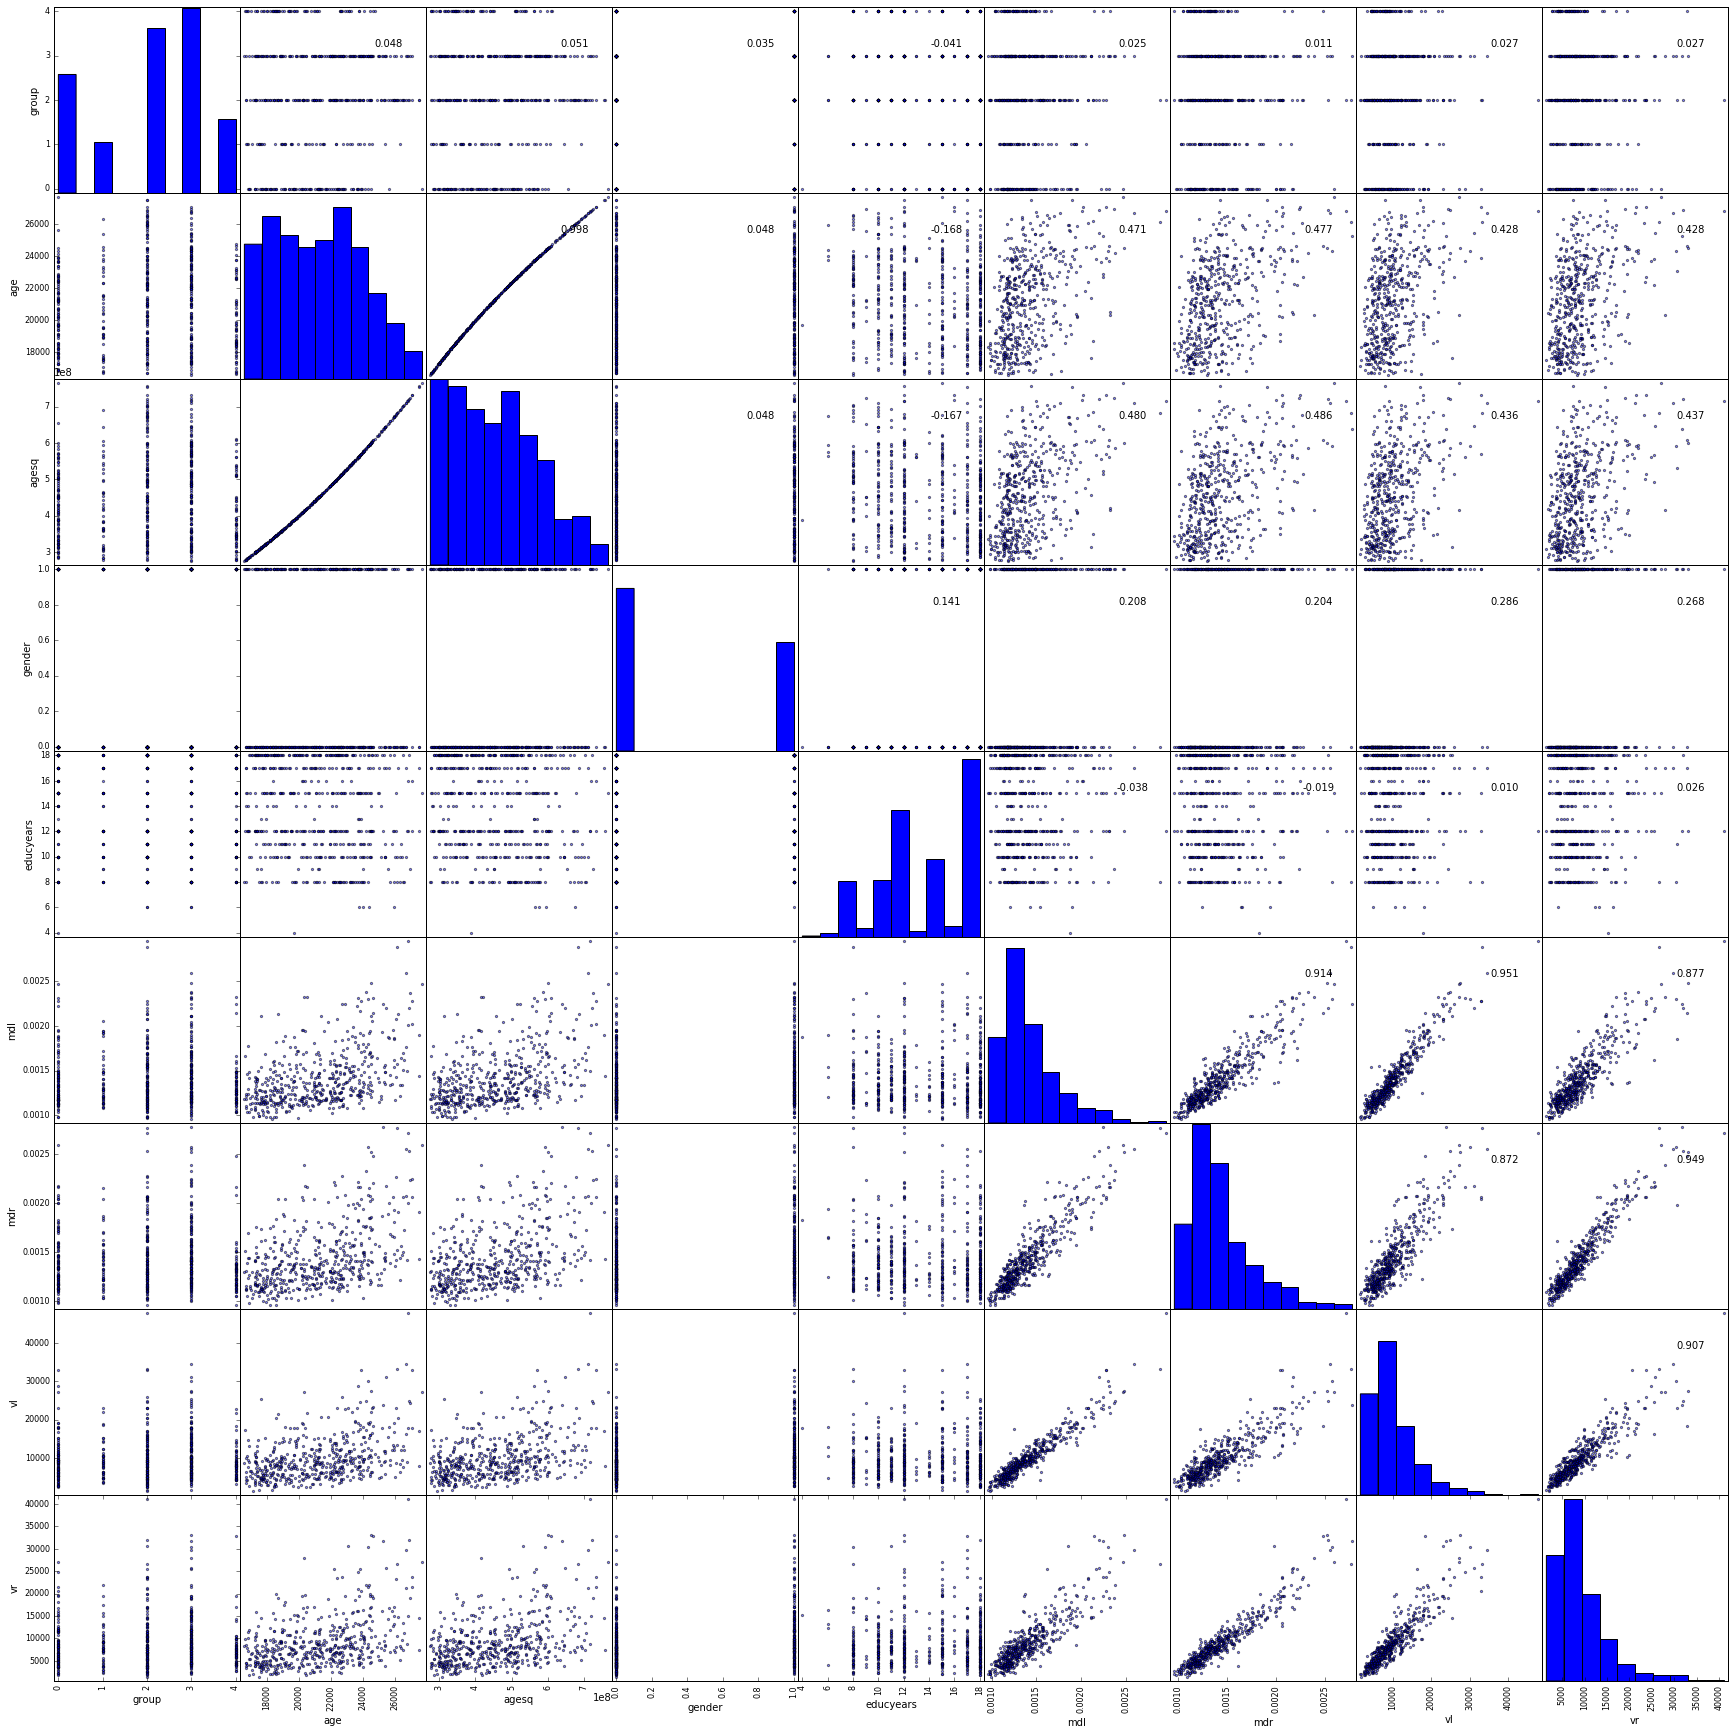

In [251]:
df_mni = pd.read_excel('/tmp/roi_mni.xls')
axes = pd.scatter_matrix(df_mni, figsize=(30,30))
corr = df_mni.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

plt.show()

Doing it on ventricular segmentation maps registered to DWI space

In [252]:
groups_size = [102, 44, 143, 160, 65]
groups_names = ['Apoe2-3', 'Apoe2-4', 'Apoe3-3', 'Apoe3-4', 'Apoe4-4']

groups = []
start = 0
for size in groups_size:
    g = subjects[start:start + size]
    start = start + size
    groups.append(g)

data_dwispace = []
for s in subjects:
    try:
        print s
        perifp = glob(osp.join(perid, '%s_latvent_dilated_DWIspace.nii.gz'%s))[0]
        print perifp
        #jacofp = glob(osp.join(jacod, 's6j_t1_%s.nii'%s))[0]
        mdfp = [e for e in glob(osp.join(alfad, '%s*'%s, 'DWI', '%s*_MD.nii*'%s)) if '.minf' not in e][0]
        #mdt1fp = glob(osp.join(alfad, '%s*'%s, 'DWI', '%s*_MD_t1space.nii.gz'%s))[0]
        
        md = np.array(nib.load(mdfp).dataobj)
        peri = np.array(nib.load(perifp).dataobj)
        mdl = np.mean(md[np.abs(peri-1)<0.5])
        mdr = np.mean(md[np.abs(peri-2)<0.5])
        
        
        age = ages[str(s)]
        group = [s in each for each in groups].index(True)
        ey = educyears[str(s)]
        jdgvol = jdg_vvol[s]
        gender = genders[str(s)]
        vl = vvol_l[s]# / tivs[str(s)]# +vvol_li[s]
        vr = vvol_r[s]# / tivs[str(s)]# + vvol_ri[s]
                
        row = [s, group, age, age*age, gender, ey, mdl, mdr, vl, vr]
        data_dwispace.append(row)
        
    except IndexError as e:
        print s, e

10070
/home/grg/spm/ROIvent/10070_latvent_dilated_DWIspace.nii.gz
10102
/home/grg/spm/ROIvent/10102_latvent_dilated_DWIspace.nii.gz
10108
/home/grg/spm/ROIvent/10108_latvent_dilated_DWIspace.nii.gz
10235
/home/grg/spm/ROIvent/10235_latvent_dilated_DWIspace.nii.gz
10365
/home/grg/spm/ROIvent/10365_latvent_dilated_DWIspace.nii.gz
10419
/home/grg/spm/ROIvent/10419_latvent_dilated_DWIspace.nii.gz
10463
/home/grg/spm/ROIvent/10463_latvent_dilated_DWIspace.nii.gz
10530
/home/grg/spm/ROIvent/10530_latvent_dilated_DWIspace.nii.gz
10551
/home/grg/spm/ROIvent/10551_latvent_dilated_DWIspace.nii.gz
10563
/home/grg/spm/ROIvent/10563_latvent_dilated_DWIspace.nii.gz
10576
/home/grg/spm/ROIvent/10576_latvent_dilated_DWIspace.nii.gz
10630
/home/grg/spm/ROIvent/10630_latvent_dilated_DWIspace.nii.gz
10668
/home/grg/spm/ROIvent/10668_latvent_dilated_DWIspace.nii.gz
10692
/home/grg/spm/ROIvent/10692_latvent_dilated_DWIspace.nii.gz
10693
/home/grg/spm/ROIvent/10693_latvent_dilated_DWIspace.nii.gz
10703
/hom

In [253]:
df_dwi = pd.DataFrame(data_dwispace, columns=['subject', 'group', 'age', 'agesq', 'gender', 'educyears', 'mdl', 'mdr', 'vl', 'vr'], index=subjects)
df_dwi.drop(10657, inplace=True) # ventricles failed
df_dwi.drop(10701, inplace=True) # ventricles failed
df_dwi.drop(21057, inplace=True) # ventricles failed
del df_dwi['subject']
df_dwi.to_excel('/tmp/roi_dwi.xls')

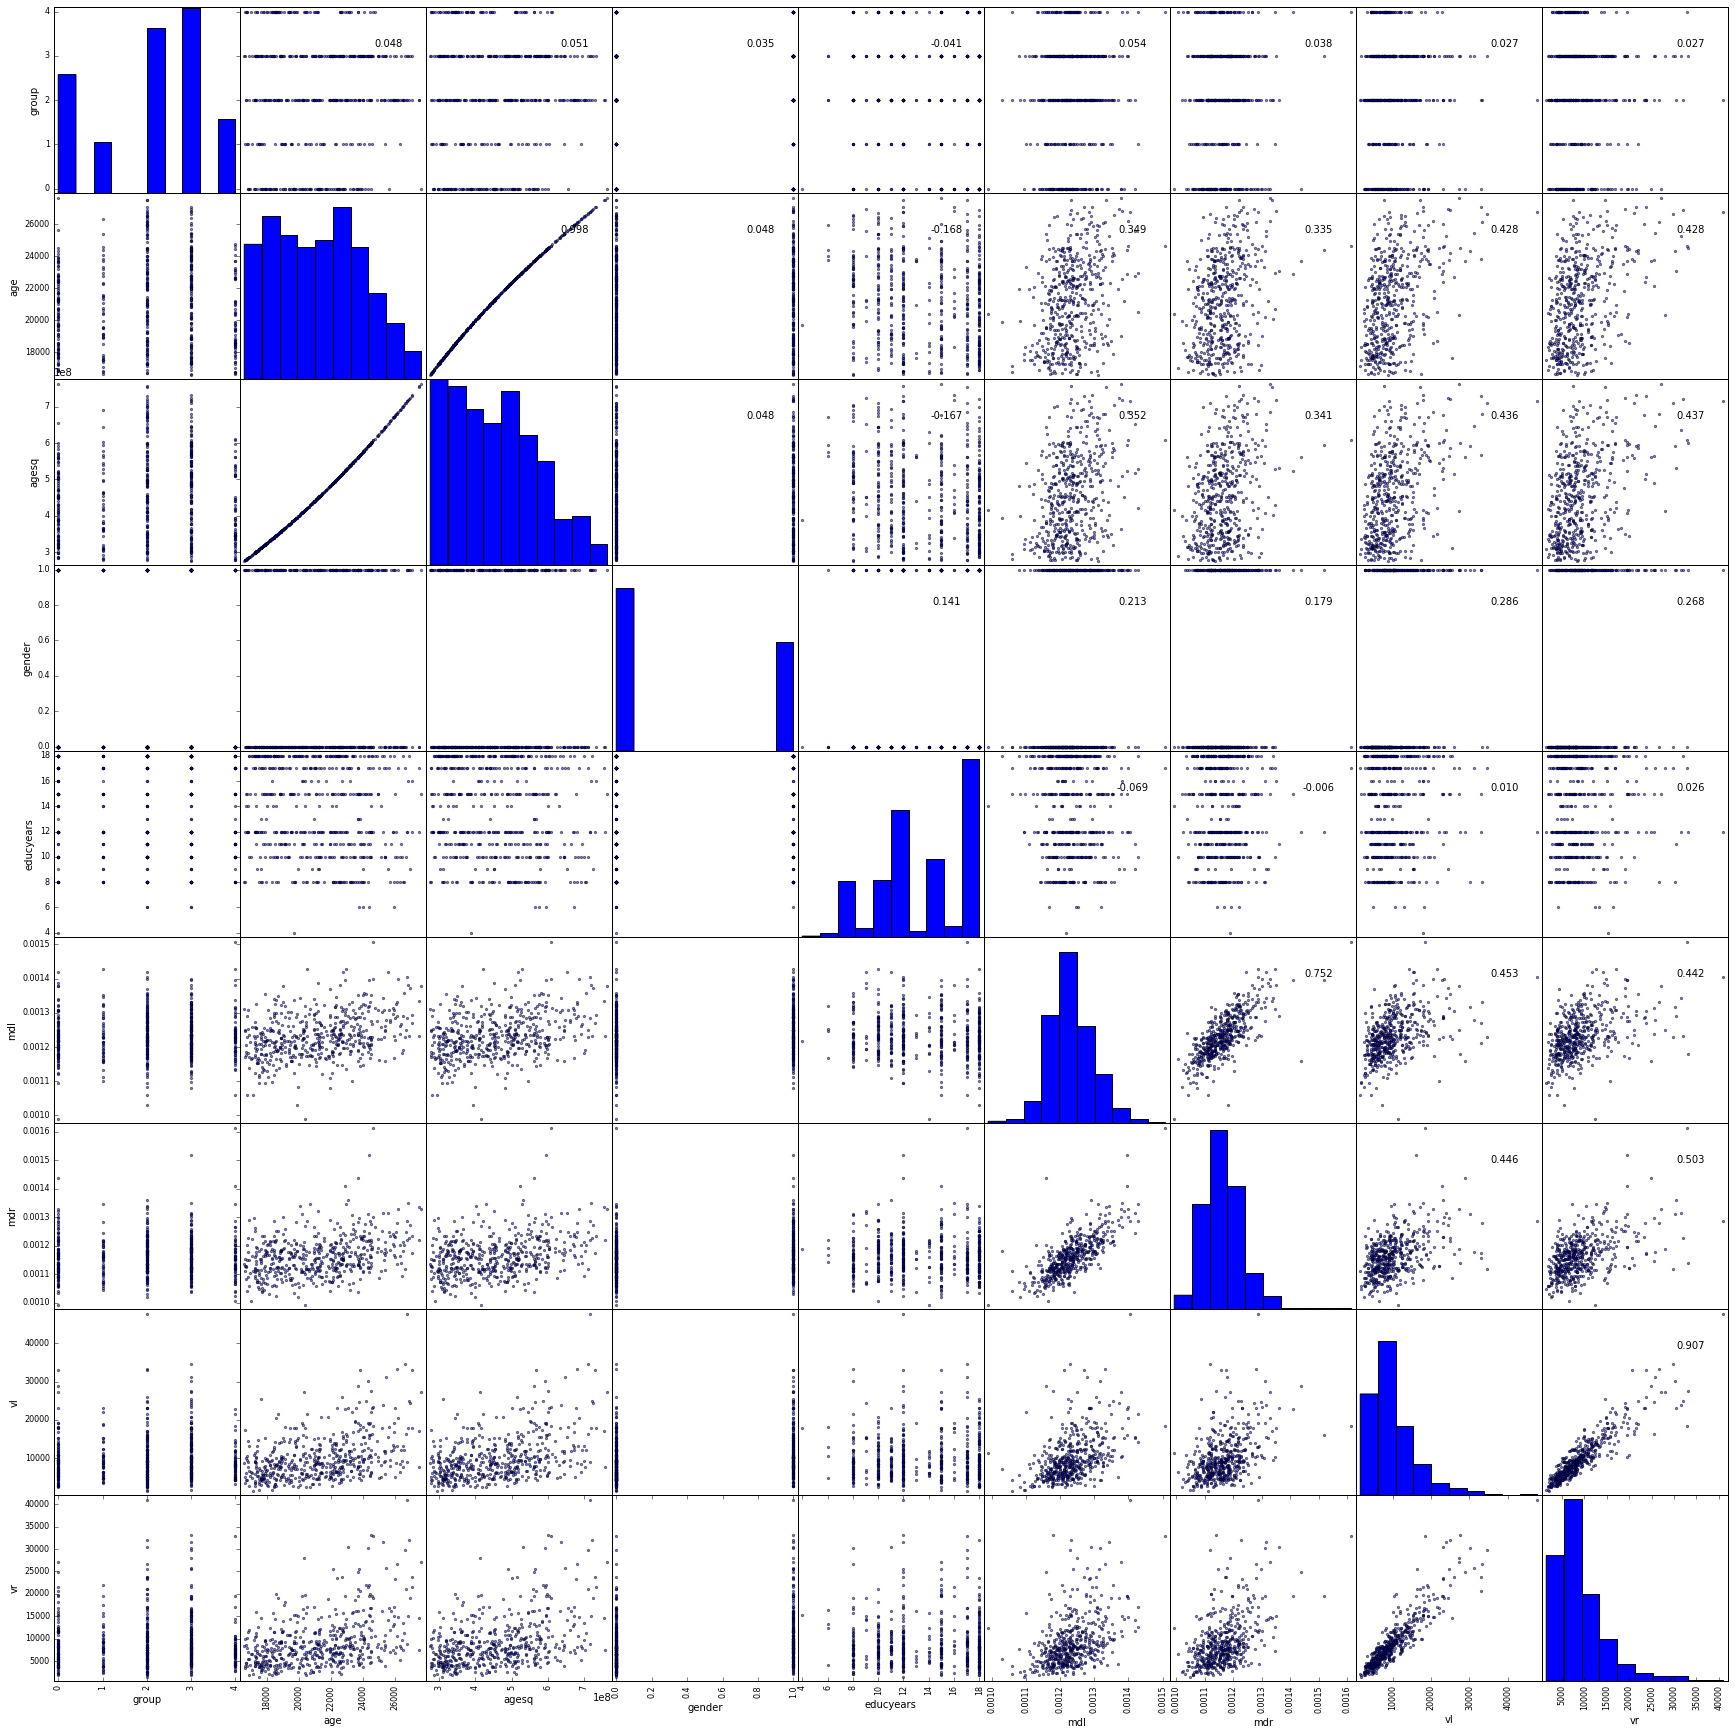

In [254]:
df_dwi = pd.read_excel('/tmp/roi_dwi.xls')
axes = pd.scatter_matrix(df_dwi, figsize=(30,30))
corr = df_dwi.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

plt.show()

           vl       mdl
vl   1.000000  0.951202
mdl  0.951202  1.000000
           vr       mdr
vr   1.000000  0.948543
mdr  0.948543  1.000000


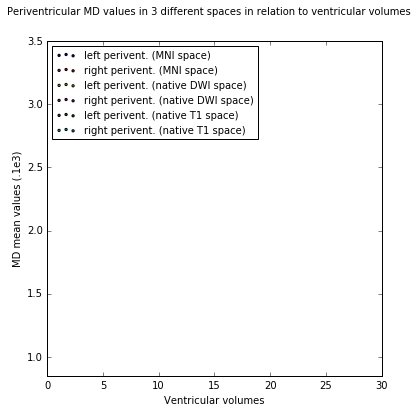

In [255]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(df_mni['vl'], df_mni['mdl']*1000.0, c='b', s=5, label='left perivent. (MNI space)')
ax.scatter(df_mni['vr'], df_mni['mdr']*1000.0, c='r', s=5, label='right perivent. (MNI space)')
ax.scatter(df_dwi['vl'], df_dwi['mdl']*1000.0, c='y', s=5, label='left perivent. (native DWI space)')
ax.scatter(df_dwi['vr'], df_dwi['mdr']*1000.0, c='m', s=5, label='right perivent. (native DWI space)')
ax.scatter(df['vl'], df['mdl']*1000.0, c='g', s=5, label='left perivent. (native T1 space)')
ax.scatter(df['vr'], df['mdr']*1000.0, c='c', s=5, label='right perivent. (native T1 space)')
plt.xlim([0, 30])
plt.ylim(0.85)
plt.legend(loc='upper left',prop={'size':10});
fig.suptitle('Periventricular MD values in 3 different spaces in relation to ventricular volumes', fontsize=10)
plt.xlabel('Ventricular volumes', fontsize=10)
plt.ylabel('MD mean values (.1e3)', fontsize=10)
df2 = pd.DataFrame(df_mni, columns=['vl', 'mdl'])
print df2.corr()
df2 = pd.DataFrame(df_mni, columns=['vr', 'mdr'])
print df2.corr()


[0.9512017839818151, 1.0]
           vr       mdr
vr   1.000000  0.948543
mdr  0.948543  1.000000


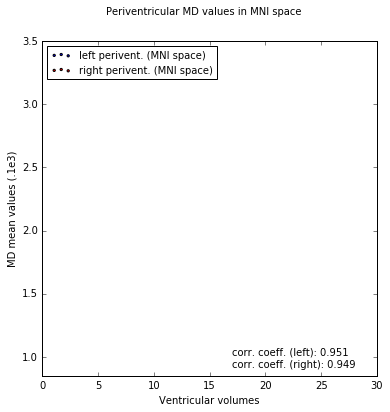

In [256]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(df_mni['vl'], df_mni['mdl']*1000.0, c='b', s=5, label='left perivent. (MNI space)')
ax.scatter(df_mni['vr'], df_mni['mdr']*1000.0, c='r', s=5, label='right perivent. (MNI space)')

df2 = pd.DataFrame(df_mni, columns=['vl', 'mdl'])
cc= df2.corr()['mdl']
print cc.tolist()
ax.text(17, 1.02, 'corr. coeff. (left): %.3f'%df2.corr()['mdl'][0], fontsize=10)
df2 = pd.DataFrame(df_mni, columns=['vr', 'mdr'])
print df2.corr()
ax.text(17, 0.92, 'corr. coeff. (right): %.3f'%df2.corr()['mdr'][0], fontsize=10)
plt.xlim([0, 30])
plt.ylim(0.85)
plt.legend(loc='upper left',prop={'size':10});
fig.suptitle('Periventricular MD values in MNI space', fontsize=10)
plt.xlabel('Ventricular volumes', fontsize=10)
plt.ylabel('MD mean values (.1e3)', fontsize=10)

[0.42770406793071375, 1.0]
           vr       age
vr   1.000000  0.428469
age  0.428469  1.000000


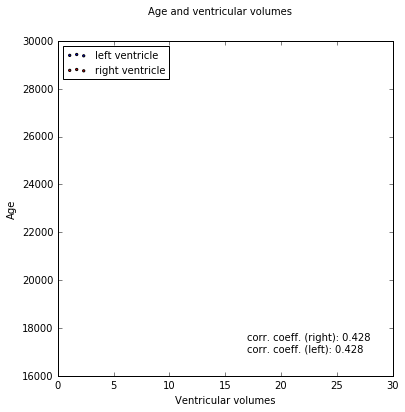

In [257]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(df_mni['vl'], df_mni['age'], c='b', s=5, label='left ventricle')
ax.scatter(df_mni['vr'], df_mni['age'], c='r', s=5, label='right ventricle')

df2 = pd.DataFrame(df_mni, columns=['vl', 'age'])
cc= df2.corr()['age']
print cc.tolist()
ax.text(17, 17000, 'corr. coeff. (left): %.3f'%df2.corr()['age'][0], fontsize=10)
df2 = pd.DataFrame(df_mni, columns=['vr', 'age'])
print df2.corr()
ax.text(17, 17500, 'corr. coeff. (right): %.3f'%df2.corr()['age'][0], fontsize=10)
plt.xlim([0, 30])
#plt.ylim(0.85)
plt.legend(loc='upper left', prop={'size':10})
fig.suptitle('Age and ventricular volumes', fontsize=10)
plt.xlabel('Ventricular volumes', fontsize=10)
plt.ylabel('Age', fontsize=10)

[0.45255225264523058, 1.0]
           vr       mdr
vr   1.000000  0.503251
mdr  0.503251  1.000000


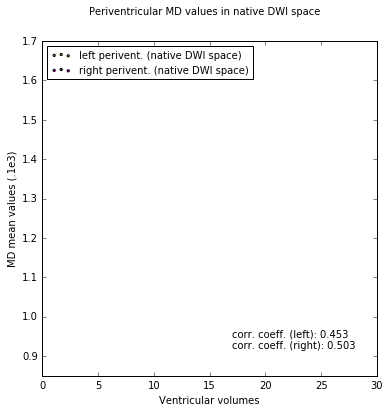

In [258]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.scatter(df_dwi['vl'], df_dwi['mdl']*1000.0, c='y', s=5, label='left perivent. (native DWI space)')
ax.scatter(df_dwi['vr'], df_dwi['mdr']*1000.0, c='m', s=5, label='right perivent. (native DWI space)')

df2 = pd.DataFrame(df_dwi, columns=['vl', 'mdl'])
cc= df2.corr()['mdl']
print cc.tolist()
ax.text(17, 0.95, 'corr. coeff. (left): %.3f'%df2.corr()['mdl'][0], fontsize=10)
df2 = pd.DataFrame(df_dwi, columns=['vr', 'mdr'])
print df2.corr()
ax.text(17, 0.92, 'corr. coeff. (right): %.3f'%df2.corr()['mdr'][0], fontsize=10)
plt.xlim([0, 30])
plt.ylim(0.85)
plt.legend(loc='upper left',prop={'size':10});
fig.suptitle('Periventricular MD values in native DWI space', fontsize=10)
plt.xlabel('Ventricular volumes', fontsize=10)
plt.ylabel('MD mean values (.1e3)', fontsize=10)


[0.40679155250651466, 1.0]
           vr       mdr
vr   1.000000  0.469821
mdr  0.469821  1.000000


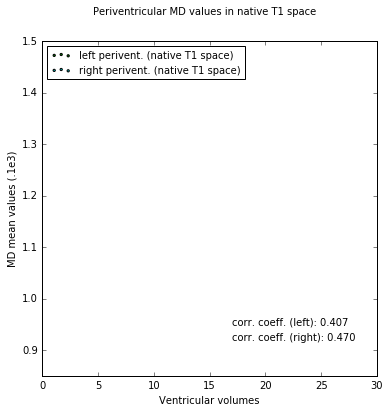

In [259]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(df['vl'], df['mdl']*1000.0, c='g', s=5, label='left perivent. (native T1 space)')
ax.scatter(df['vr'], df['mdr']*1000.0, c='c', s=5, label='right perivent. (native T1 space)')

df2 = pd.DataFrame(df, columns=['vl', 'mdl'])
cc= df2.corr()['mdl']
print cc.tolist()
ax.text(17, 0.95, 'corr. coeff. (left): %.3f'%df2.corr()['mdl'][0], fontsize=10)
df2 = pd.DataFrame(df, columns=['vr', 'mdr'])
print df2.corr()
ax.text(17, 0.92, 'corr. coeff. (right): %.3f'%df2.corr()['mdr'][0], fontsize=10)
plt.xlim([0, 30])
plt.ylim(0.85)
plt.legend(loc='upper left',prop={'size':10});
fig.suptitle('Periventricular MD values in native T1 space', fontsize=10)
plt.xlabel('Ventricular volumes', fontsize=10)
plt.ylabel('MD mean values (.1e3)', fontsize=10)

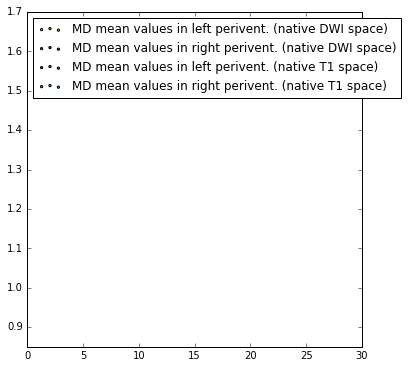

In [260]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(df_dwi['vl'], df_dwi['mdl']*1000.0, c='y', s=5, label='MD mean values in left perivent. (native DWI space)')
ax.scatter(df_dwi['vr'], df_dwi['mdr']*1000.0, c='m', s=5, label='MD mean values in right perivent. (native DWI space)')
ax.scatter(df['vl'], df['mdl']*1000.0, c='g', s=5, label='MD mean values in left perivent. (native T1 space)')
ax.scatter(df['vr'], df['mdr']*1000.0, c='c', s=5, label='MD mean values in right perivent. (native T1 space)')

plt.xlim([0, 30])
plt.ylim(0.85)
plt.legend(loc='upper left');

# Doing it on that periventricular supra-threshold cluster in the right hemisphere

In [6]:
#md_mni = glob('/home/grg/data/ALFA_DWI/*/DWI/*MD_MNIspace.nii.gz')
groups_size = [102, 44, 143, 160, 65]
groups_names = ['Apoe2-3', 'Apoe2-4', 'Apoe3-3', 'Apoe3-4', 'Apoe4-4']

groups = []
start = 0
for size in groups_size:
    g = subjects[start:start + size]
    start = start + size
    groups.append(g)

data_cluster = []
for s in subjects:
    try:
        print s
        perifp = '/tmp/label.nii.gz' #glob(osp.join(perid, '%s_latvent_dilated.nii.gz'%s))[0]
        print perifp
        mdmnifp = glob(osp.join(alfad, '%s*'%s, 'DWI', '%s*_MD_MNIspace.nii.gz'%s))[0]
        
        mdmni = np.array(nib.load(mdmnifp).dataobj)
        im_peri = nib.load(perifp)
        
        resample_im_peri = np.array(image.resample_to_img(im_peri, mdmnifp, interpolation='nearest').dataobj)
        
        cluster_meanval = np.mean(mdmni[np.abs(resample_im_peri-1)<0.5])
        #mdr = np.mean(mdmni[np.abs(resample_im_peri-1)<0.5])
        
        age = ages[str(s)]
        group = [s in each for each in groups].index(True)
        ey = educyears[str(s)]
        jdgvol = jdg_vvol[s]
        gender = genders[str(s)]
        #vl = vvol_l[s]# / tivs[str(s)]# +vvol_li[s]
        vr = vvol_r[s]# / tivs[str(s)]# + vvol_ri[s]
                
        row = [s, group, age, age*age, gender, ey, cluster_meanval, vr]
        data_cluster.append(row)
        
    except IndexError as e:
        print s, e

10070
/tmp/label.nii.gz
10102
/tmp/label.nii.gz
10108
/tmp/label.nii.gz
10235
/tmp/label.nii.gz
10365
/tmp/label.nii.gz
10419
/tmp/label.nii.gz
10463
/tmp/label.nii.gz
10530
/tmp/label.nii.gz
10551
/tmp/label.nii.gz
10563
/tmp/label.nii.gz
10576
/tmp/label.nii.gz
10630
/tmp/label.nii.gz
10668
/tmp/label.nii.gz
10692
/tmp/label.nii.gz
10693
/tmp/label.nii.gz
10703
/tmp/label.nii.gz
10725
/tmp/label.nii.gz
10737
/tmp/label.nii.gz
10756
/tmp/label.nii.gz
10809
/tmp/label.nii.gz
11045
/tmp/label.nii.gz
11047
/tmp/label.nii.gz
11048
/tmp/label.nii.gz
11133
/tmp/label.nii.gz
11180
/tmp/label.nii.gz
11225
/tmp/label.nii.gz
11262
/tmp/label.nii.gz
11305
/tmp/label.nii.gz
11351
/tmp/label.nii.gz
11360
/tmp/label.nii.gz
11387
/tmp/label.nii.gz
11407
/tmp/label.nii.gz
11414
/tmp/label.nii.gz
11416
/tmp/label.nii.gz
11550
/tmp/label.nii.gz
11610
/tmp/label.nii.gz
11614
/tmp/label.nii.gz
11638
/tmp/label.nii.gz
11658
/tmp/label.nii.gz
11691
/tmp/label.nii.gz
11721
/tmp/label.nii.gz
11737
/tmp/label

In [9]:
df_cluster = pd.DataFrame(data_cluster, columns=['subject', 'group', 'age', 'agesq', 'gender', 'educyears', 'cluster_meanval', 'vr'], index=subjects)
df_cluster.drop(10657, inplace=True) # ventricles failed
df_cluster.drop(10701, inplace=True) # ventricles failed
df_cluster.drop(21057, inplace=True) # ventricles failed
del df_cluster['subject']
df_cluster.to_excel('/tmp/roi_cluster.xls')

                       vr  cluster_meanval
vr               1.000000         0.554056
cluster_meanval  0.554056         1.000000


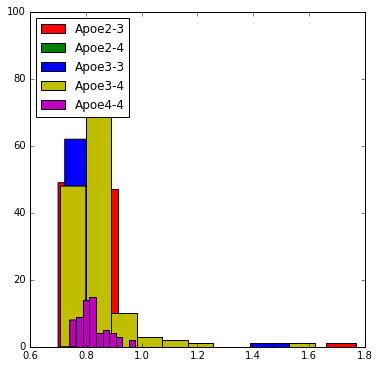

In [30]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
colors = ['r','g','b','y','m']
for i in xrange(5):
    dfi = df_cluster[df_cluster['group']==i]
    #ax.scatter(dfi['vr'], dfi['cluster_meanval']*1000.0, c=colors[i], s=10, label=groups_names[i])
    ax.hist(dfi['cluster_meanval']*1000.0, color=colors[i], label=groups_names[i])
df2 = pd.DataFrame(df_cluster, columns=['vr', 'cluster_meanval'])
print df2.corr()
#plt.xlim([0, 50000])

    #ax.text(30000, 0.92, 'corr. coeff. (right): %.3f'%df2.corr()['cluster_meanval'][0], fontsize=10)
plt.legend(loc='upper left')
plt.show()